In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
sns.set_theme()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
#import scorecardpy as sc
from sklearn.model_selection import cross_val_score

In [5]:
df =pd.read_csv('bank-additional-full.csv', delimiter = ';')

In [6]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

In [8]:
Null_df = pd.concat([total, percent], axis = 1,
                          keys = ['Total', 'Null Percentage']).reset_index().rename(columns = {'index': "Name"})

In [9]:
Null_df

,Name,Total,Null Percentage
0,age,0,0.0
1,campaign,0,0.0
2,nr.employed,0,0.0
3,euribor3m,0,0.0
4,cons.conf.idx,0,0.0
5,cons.price.idx,0,0.0
6,emp.var.rate,0,0.0
7,poutcome,0,0.0
8,previous,0,0.0
9,pdays,0,0.0


In [6]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [7]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [8]:
df['education'] = df['education'].apply(lambda x:'basic' if(x =='basic.9y' or x =='basic.4y' or x=='basic.6y') else x )

In [9]:
df['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
list_age = df[df['job']== 'unknown']['age'].value_counts().index

In [11]:
list_age

Int64Index([45, 55, 53, 44, 35, 41, 32, 34, 38, 50, 49, 52, 47, 43, 56, 46, 60,
            58, 30, 59, 57, 42, 48, 27, 28, 24, 64, 26, 36, 37, 61, 33, 31, 25,
            81, 40, 51, 66, 54, 63, 78, 76, 65, 29, 69, 72, 62, 67],
           dtype='int64')

In [12]:
df[df['age']==45]['job'].value_counts().idxmax()

'blue-collar'

In [13]:
for age in list_age:
    df.loc[((df['age']==age)&(df['job'] == 'unknown'))\
           ,['job']] = df[df['age']==age]['job'].value_counts().idxmax()
#truy cap vao vi tri tuoi nhat dinh voi job la unknown roi thay no voi gia tri voi job la cai xuat hien nhieu nhat

In [14]:
df['job'].value_counts()

admin.           10547
blue-collar       9409
technician        6743
services          3969
management        2924
retired           1764
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            881
Name: job, dtype: int64

In [15]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [16]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [17]:
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
df['month'] = df['month'].apply(lambda x: months.index(x)+1)

In [18]:
days = ['mon','tue','wed','thu','fri','sat','sun']
df['day_of_week'] = df['day_of_week'].apply(lambda x: days.index(x)+1)

In [19]:
df['day_of_week'].value_counts()

4    8623
1    8514
3    8134
2    8090
5    7827
Name: day_of_week, dtype: int64

In [20]:
df['month'].value_counts()

5     13769
7      7174
8      6178
6      5318
11     4101
4      2632
10      718
9       570
3       546
12      182
Name: month, dtype: int64

In [29]:
job_encoded_df = pd.get_dummies(df['job'], prefix = 'job')

In [30]:
job_encoded_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,0
41184,0,1,0,0,0,0,0,0,0,0,0
41185,0,0,0,0,0,1,0,0,0,0,0
41186,0,0,0,0,0,0,0,0,0,1,0


In [33]:
pd.concat([df,job_encoded_df], axis = 1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,housemaid,married,basic,no,no,no,telephone,5,1,...,0,0,1,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,0,0,0,0,0,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,0,0,0,0,0,0,1,0,0,0
3,40,admin.,married,basic,no,no,no,telephone,5,1,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,5,...,0,0,0,0,1,0,0,0,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,...,1,0,0,0,0,0,0,0,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,11,5,...,0,0,0,0,1,0,0,0,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,11,5,...,0,0,0,0,0,0,0,0,1,0


In [34]:
marital_encoded_df = pd.get_dummies(df['marital'], prefix = 'marital')

In [35]:
marital_encoded_df

,marital_divorced,marital_married,marital_single,marital_unknown
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
41183,0,1,0,0
41184,0,1,0,0
41185,0,1,0,0
41186,0,1,0,0


In [36]:
pd.concat([df,marital_encoded_df], axis = 1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,marital_unknown
0,56,housemaid,married,basic,no,no,no,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0
3,40,admin.,married,basic,no,no,no,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,5,...,-1.1,94.767,-50.8,1.028,4963.6,yes,0,1,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,...,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,11,5,...,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,11,5,...,-1.1,94.767,-50.8,1.028,4963.6,yes,0,1,0,0


In [37]:
education_encoded_df = pd.get_dummies(df['education'], prefix = 'education')

In [38]:
education_encoded_df

,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
41183,0,0,0,1,0,0
41184,0,0,0,1,0,0
41185,0,0,0,0,1,0
41186,0,0,0,1,0,0


In [39]:
pd.concat([df,education_encoded_df], axis = 1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,housemaid,married,basic,no,no,no,telephone,5,1,...,-36.4,4.857,5191.0,no,1,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,-36.4,4.857,5191.0,no,0,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,-36.4,4.857,5191.0,no,0,1,0,0,0,0
3,40,admin.,married,basic,no,no,no,telephone,5,1,...,-36.4,4.857,5191.0,no,1,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,-36.4,4.857,5191.0,no,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,5,...,-50.8,1.028,4963.6,yes,0,0,0,1,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,...,-50.8,1.028,4963.6,no,0,0,0,1,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,11,5,...,-50.8,1.028,4963.6,no,0,0,0,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,11,5,...,-50.8,1.028,4963.6,yes,0,0,0,1,0,0


In [45]:
poutcome_encoded_df = pd.get_dummies(df['poutcome'],prefix = 'poutcome')
pd.concat([df,poutcome_encoded_df], axis = 1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic,no,no,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0
3,40,admin.,married,basic,no,no,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0,1,0


In [46]:
contact_encoded_df = pd.get_dummies(df['contact'],prefix = 'contact')
pd.concat([df,contact_encoded_df], axis = 1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_cellular,contact_telephone
0,56,housemaid,married,basic,no,no,no,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
3,40,admin.,married,basic,no,no,no,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,0


In [49]:
df['education'] = df ['education'].str.replace('basic. \w+','basic',regex = True)
categories = pd.Categorical(df['education'], \
                           categories = {'unknown','illiterate','basic', \
                                        'high.school','university.degree','professtional.courses'})
df['education'] = categories.codes

In [50]:
df['housing'] = df['housing'].apply(lambda x : 1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x : 1 if x == 'yes' else 0)
df['default'] = df['default'].apply(lambda x : 1 if x == 'yes' else 0)

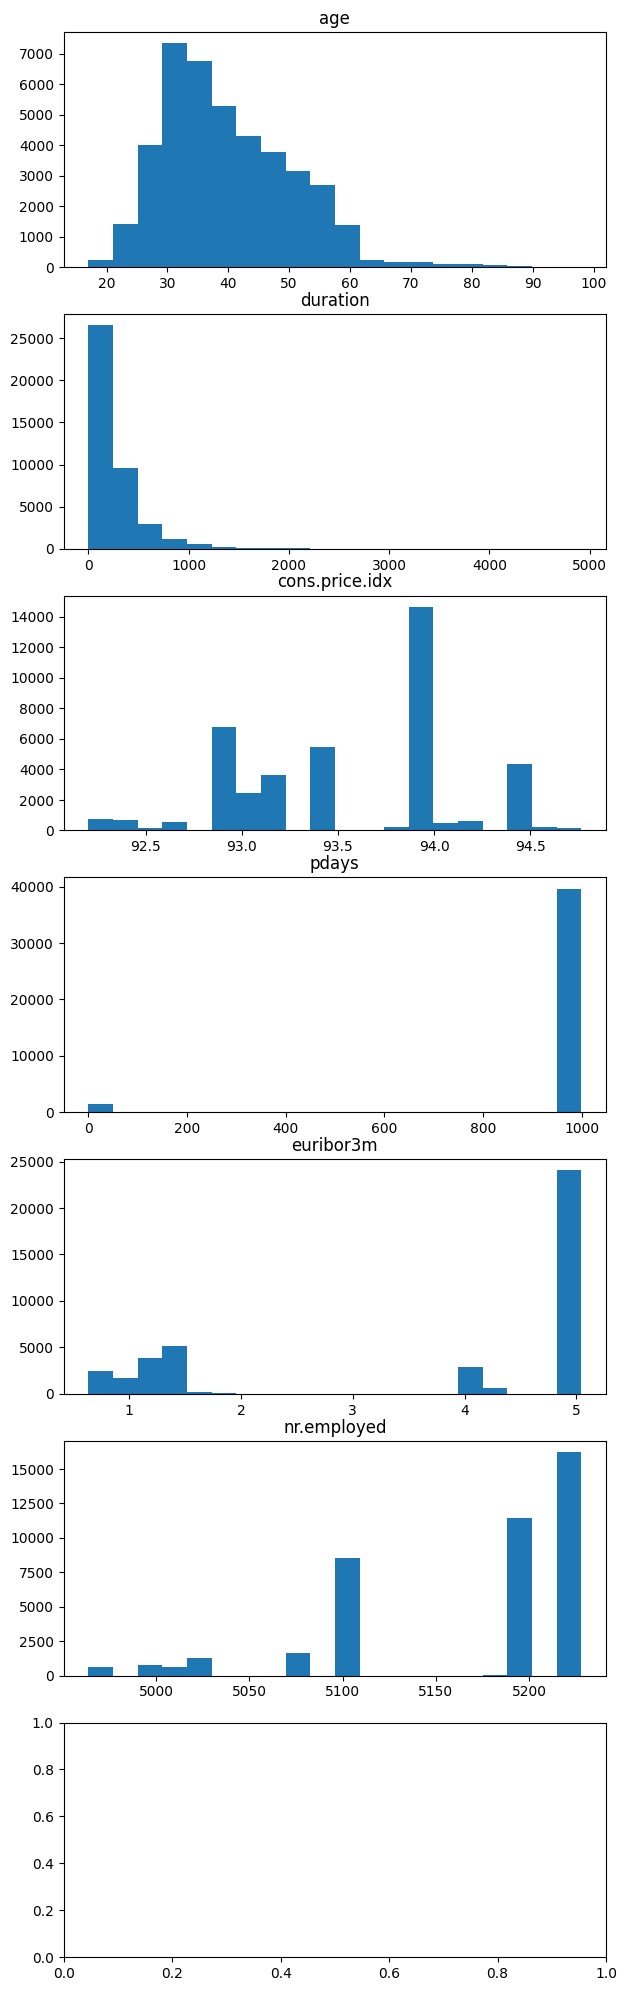

In [55]:
fig,ax = plt.subplots(7,1,figsize = [7,25])
i = 0
for col in ['age','duration','cons.price.idx','pdays','euribor3m','nr.employed']:
    ax[i].hist(df[col], bins=20)
    ax[i].set_title(col)
    i+=1